<a href="https://colab.research.google.com/github/VaibhavBhusawale/Book_Recommendation_system/blob/main/new_Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.                                                                             
              
Content
The Book-Crossing dataset comprises 3 files.

● Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Table of Contents**
1. Introduction to a Recommendation system
2. Importing Required libraries
2. Types of Recommendation system
3. Book Recommendation System
4. Content-Based Filtering
5. Collaborative-based filtering
6. Hybrid filtering
7. Hands-on Recommendation system
8. Dataset Description
9. Preprocess data
10. Perform EDA
11. Clustering
12. Predictions




In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# importing data
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the health insurance data set 
books = pd.read_csv("/content/drive/MyDrive/capstone_project_4_book_recommendation_system/Books.csv",low_memory='False')
users = pd.read_csv("/content/drive/MyDrive/capstone_project_4_book_recommendation_system/Users.csv",low_memory='False')
ratings = pd.read_csv("/content/drive/MyDrive/capstone_project_4_book_recommendation_system/Ratings.csv",low_memory='False')


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books['Image-URL-M'][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [ ]:
 users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


The dataset is reliable and can consider as a large dataset. we have 271360 books data and total registered users on the website are approximately 278858 and they have given near about 1149780  rating. hence we can say that the dataset we have is nice and reliable.

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In our model we don't need to use Age feature 

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
books.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

## Popularity Based Recommender System


In [ ]:
rating_with_name = ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {'Book-Rating':'num_rating'}, inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = rating_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns = {'Book-Rating':'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df=popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating']]

In [ ]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [ ]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

##Collabarative Filtering Based Recommender System

In [ ]:
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [ ]:
books.columns


Index(['ISBN', 'title', 'author', 'year', 'publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books=books[['ISBN', 'title', 'author', 'year', 'publisher','Image-URL-M']]

In [ ]:
books.head()

,ISBN,title,author,year,publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Merging Dataframes
# temp_df = books.merge(ratings, how='left', on='ISBN')
# final_df = temp_df.merge(users, how='left', on='user_id')
# final_df.shape

Each User How many times rating

In [ ]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
ratings['user_id'].value_counts().shape

(105283,)

In [ ]:
x = ratings['user_id'].value_counts()>200

In [ ]:
y =x[x].index

In [ ]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]

In [ ]:
ratings.shape

(526356, 3)

In [ ]:
books.head()

,ISBN,title,author,year,publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
rating_with_books = ratings.merge( books, on = 'ISBN')

In [ ]:
rating_with_books.shape

(487671, 8)

In [ ]:
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.rename(columns={'rating':'number_of_rating'},inplace=True)

In [ ]:
number_rating.head()

,title,number_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
final_rating = rating_with_books.merge(number_rating,on = 'title')

In [ ]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-M,number_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [ ]:
final_rating.shape

(487671, 9)

who has rating above or equal to 50 those books only consider 

In [ ]:
final_rating=final_rating[final_rating ['number_of_rating']>=50]

In [ ]:
final_rating.shape

(61853, 9)

In [ ]:
final_rating.drop_duplicates(['user_id','title'],inplace = True)

In [ ]:
final_rating.shape

(59850, 9)

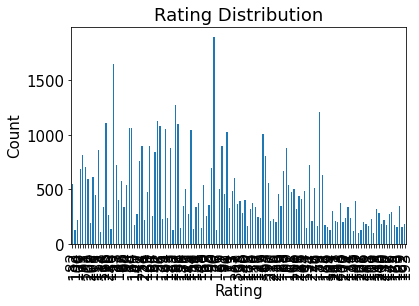

In [ ]:
plt.rc("font",size =15)
final_rating.number_of_rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("system1.png",bbox_inches='tight')
plt.show()

In [ ]:
# from google.colab import files
# final_rating.to_csv('final_rating.csv') 
# files.download('final_rating.csv')

Creating pivot table to show  the users rating on a every books

In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id',index = 'title',values = 'rating')

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.shape

(742, 888)

finally books remaining 742 and users is 888 but

 what about NaN values fill that NaN values

In [ ]:
book_pivot.fillna(0,inplace=True)

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


because of so many zeroes if we calculate distances then so many time will taken so we use sparse matrix to simplify our distance calculation for k nearest neighbour algorithm

In [ ]:
from scipy.sparse import  csr_matrix

In [ ]:
book_sparse = csr_matrix(book_pivot)

In [ ]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [ ]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

1.K Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model = NearestNeighbors(algorithm = 'brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distances,suggestions = model.kneighbors(book_pivot.iloc[54, :].values.reshape(1,-1),n_neighbors = 6)

In [ ]:
distances

array([[ 0.        , 42.34383072, 43.48562981, 43.50861984, 43.56604182,
        43.89760814]])

In [ ]:
suggestions

array([[ 54, 184, 291, 440, 393, 372]])

In [ ]:
for i in range (len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [ ]:
np.where(book_pivot.index=='Message in a Bottle')[0][0]

335

In [ ]:
def recommend_book(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors = 6)
  for i in range (len(suggestions)):
    
      print(book_pivot.index[suggestions[i][1:5]])



In [ ]:
recommend_book('Message in a Bottle')

Index(['Exclusive', 'Nights in Rodanthe', 'Harvest', 'The Sands of Time'], dtype='object', name='title')


Cosine Similarity

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def recommend_books(book_name):
  query_index = np.where(book_pivot.index==book_name)[0][0]
  print(query_index)
  distances, indices = model_knn.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


In [ ]:
recommend_books('Naked')

358
Recommendations for Naked:

1: Me Talk Pretty One Day, with distance of 0.6545588833986331:
2: 1984, with distance of 0.8039283491773567:
3: Big Trouble, with distance of 0.806687213041357:
4: Bastard Out of Carolina, with distance of 0.8135603168032868:
5: Turtle Moon, with distance of 0.8207052172096709:


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(book_pivot)

In [ ]:
similarity_scores.shape

(742, 742)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_rating[final_rating['title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
# from google.colab import files
# files.download('popular.pkl')

In [ ]:
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))
pickle.dump(final_rating,open('final_rating.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [ ]:
# from google.colab import files
# files.download('book_pivot.pkl')
# files.download('final_rating.pkl')
# files.download('similarity_scores.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# pickle.dump(recommend_book.to_dict(),open('books_dict.pkl','wb'))